In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from src.var_selection import prepare_model_data, initiate_models, apply_var_selection, get_var_selection_table

# Prepare input data

In [2]:
matrix_file = './Outputs/Event_Matrix.csv'

# read data, split train and test and normalize using sklearn.preprocessing.StandardScaler()
X_train, X_test, y_train, y_test, var_names = prepare_model_data(data_file = matrix_file, test_size = 0.2)

print("Number of predictors: ", X_train.shape[1])

print("Number of training samples: ", X_train.shape[0])

print("Number of testing samples: ", X_test.shape[0])


Number of predictors:  49
Number of training samples:  61
Number of testing samples:  16


# Apply Variable selection algorithm and save results in local disk

In [ ]:
# create Random Forest, KNN and GBT models using parameters in 'model_params.txt'
model_list = initiate_models()

# Apply backward and exhaustive selection algorithms
n_vars_to_select_in_backward = 6
var_selection_optimum_models_DF, all_models_dict = apply_var_selection(model_list, X_train, y_train, var_names, n_vars_to_select_in_backward = n_vars_to_select_in_backward)

# Save summary DataFrame 
var_selection_optimum_models_DF.to_csv('./Outputs/Models/Variable_Selection_Summary.csv')

# Save full results
with open('./Outputs/Models/variable_selection_full_results.pkl', 'wb') as handle:
    pickle.dump(all_models_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Var selection Summary: ")
display(var_selection_optimum_models_DF)

# Visualize variable selection results 

In [9]:
import pandas as pd
import pickle

var_selection_optimum_models_DF = pd.read_csv('./Outputs/Models/Variable_Selection_Summary.csv')

with open('./Outputs/Models/variable_selection_full_results.pkl', 'rb') as handle:
    all_models_dict = pickle.load(handle)




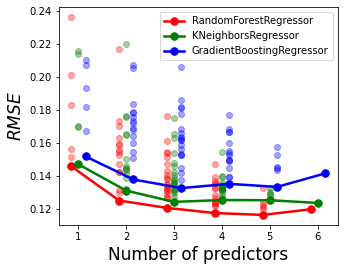

In [24]:
from importlib import reload
import sys
# from src.model_performance_plots import plot_optimum_models, plot_all_models
reload(sys.modules['src.model_performance_plots'])
from src.model_performance_plots import plot_optimum_models, plot_all_models

fig, ax = plt.subplots(figsize = (5,4))

models = list(var_selection_optimum_models_DF.model.unique())

plot_optimum_models(ax, var_selection_optimum_models_DF, models)
plot_all_models(ax, all_models_dict, models)
   

In [25]:
var_selection_optimum_models_DF

,avg_score,std_dev,feature_names,n_vars,model
1,-0.146099,0.034304,[Tf_bf_peak_ratio],1,RandomForestRegressor
12,-0.125371,0.027117,"[Tf_bf_peak_ratio, peakTurb]",2,RandomForestRegressor
35,-0.120910,0.023388,"[Tf_bf_peak_ratio, peakTurb, P_15h_acum]",3,RandomForestRegressor
54,-0.117809,0.024061,"[Tf_bf_peak_ratio, peakTurb, load_25D, P_15h_a...",4,RandomForestRegressor
61,-0.116663,0.029851,"[Tf_bf_peak_ratio, cum_Qcm_25D, peakTurb, load...",5,RandomForestRegressor
62,-0.120071,0.029880,"[mean_bf, Tf_bf_peak_ratio, cum_Qcm_25D, peakT...",6,RandomForestRegressor
4,-0.147277,0.013758,[P_15h_acum],1,KNeighborsRegressor
13,-0.131337,0.026424,"[bf_qf_peak_ratio, P_15h_acum]",2,KNeighborsRegressor
23,-0.124542,0.030142,"[max_bf, bf_qf_peak_ratio, P_15h_acum]",3,KNeighborsRegressor
46,-0.125663,0.025841,"[max_bf, bf_qf_peak_ratio, P_15h_acum, P_40d_a...",4,KNeighborsRegressor


In [53]:
from src.var_selection import efs_dict_to_DF
efs_dict_to_DF(all_models_dict)

,avg_score,std_dev,feature_names,n_vars,model
1,-0.146250,0.034289,[Tf_bf_peak_ratio],1,RandomForestRegressor
11,-0.125908,0.027420,"[Tf_bf_peak_ratio, peakTurb]",2,RandomForestRegressor
31,-0.123967,0.019403,"[Tf_bf_peak_ratio, peakTurb, P_15h_acum]",3,RandomForestRegressor
52,-0.119434,0.024647,"[Tf_bf_peak_ratio, peakTurb, P_15h_acum, P_40d...",4,RandomForestRegressor
57,-0.115855,0.027354,"[max_qf, Tf_bf_peak_ratio, peakTurb, P_15h_acu...",5,RandomForestRegressor
62,-0.122032,0.026728,"[max_qf, Tf_bf_peak_ratio, peakTurb, P_15h_acu...",6,RandomForestRegressor
4,-0.147277,0.013758,[P_15h_acum],1,KNeighborsRegressor
13,-0.131337,0.026424,"[bf_qf_peak_ratio, P_15h_acum]",2,KNeighborsRegressor
23,-0.124542,0.030142,"[max_bf, bf_qf_peak_ratio, P_15h_acum]",3,KNeighborsRegressor
46,-0.125663,0.025841,"[max_bf, bf_qf_peak_ratio, P_15h_acum, P_40d_a...",4,KNeighborsRegressor


# Define Final variables for each ML algorithm and fine-tune model parameters 

In [ ]:
selected_vars = {'RandomForestRegressor'     : [],
                 'KNeighborsRegressor'       : [],
                 'GradientBoostingRegressor' : []
                 } 

final_models, optimized_parameters = optimize_model_parameters()

# Show results
show_optimized_parameters(optimized_parameters)

#save models
output_file = 'models.pkl'
save_models(output_file, final_models)

